<a href="https://colab.research.google.com/github/PremGorecki/DataScience/blob/main/%2006_uczenie_maszynowe/04_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
np.random.seed(10)

# od 0 do 50 z krokiem 1/2
X = np.arange(0, 50, 0.5)

noise = 10 * np.random.randn(100)

y = 2 * X + 100 + noise
X = X.reshape(-1, 1)  # 1-go i 50-kolumn robi tyle ile trzeba wierszy (-1) #
#i jedną kolumnę czyli ta druga 1-ka

print('Rozmiar X:',X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


Podział danych na zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (15, 1)
X_test shape: (5, 1)
y_train_shape (15,)
y_test shape (5,)


Wizualizacja

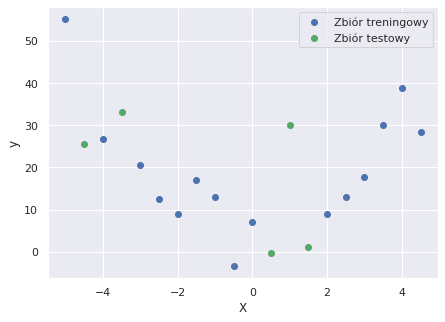

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Regresja liniowa

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_) # wagi
print(lin_reg.intercept_) # wyraz wolny

[-0.30937519]
19.606422746102137


Rozwiązaniem jest prosta o postać $Y  = 101.86 + 1.93 * X_1$

Wizualizacja zbioru treningowego i dopasowanego modelu

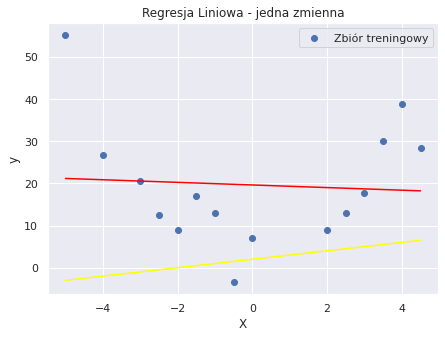

In [8]:
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.plot(X, 2 + 1*X, c='yellow') # sprawdzam jak się rysuje :)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Wizualizacja zbioru testowego i dopasowanego modelu

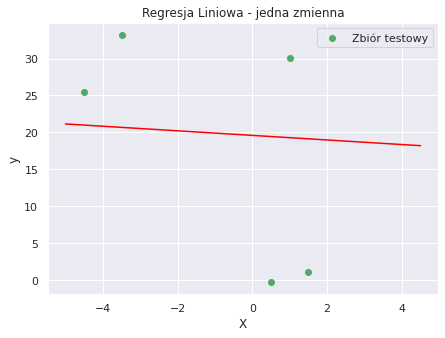

In [9]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [10]:
# Teraz robimy ocenę modelu przez współczynnik determinacji
lin_reg.score(X_test, y_test)

0.04264439998341485

In [11]:
# tak można dostać pomoc
lin_reg.score?

Przykład złego zastosowania regresji liniowej

[-1.33897282]
21.5641042905547


Text(0, 0.5, 'y')

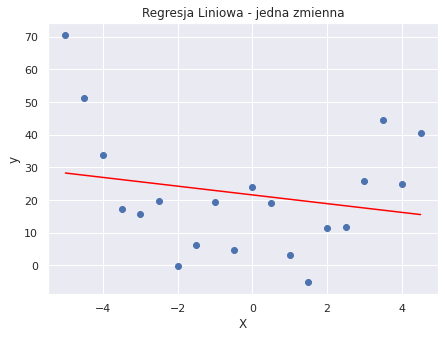

In [12]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')